In [1]:
## From http://cs231n.github.io/neural-networks-case-study/#grad
import numpy as np
import matplotlib.pyplot as plt


# Data

In [2]:
N = 100; D = 2; K =3 ;

In [3]:
X= np.zeros((N*K,D)) # (x,y for our data)
y = np.zeros(N*K, dtype='uint8') # labels
np.linspace(0.0,1,N)

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

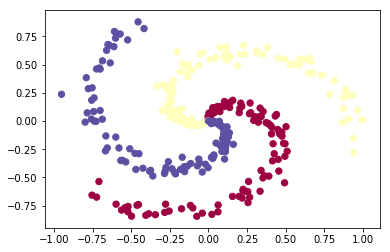

In [4]:
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    radius = np.linspace(0.0,1,N)
    theta = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    X[ix] = np.c_[radius*np.sin(theta), radius*np.cos(theta)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Weights and bias

In [5]:
def init_weights():
    W = 0.01 * np.random.randn(D,K)
    W.shape
    b = np.zeros((1,K))
    return (W,b)
    (b.shape, W.shape)


In [6]:
X[1,:]

array([-0.00471708,  0.00893194])

In [7]:
#scores = np.dot(X,W) + b

In [8]:
#f = scores[1] # array of classe scores, unnormalized log probabilities

In [9]:
def class_probs():
    scores = np.dot(X,W) + b
    probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True) # probabilities
    return (scores, probs)
    # np.exp(scores).shape, np.sum(np.exp(scores),axis=1).shape

In [10]:
len(X)

300

# Loss calculation

In [11]:
# Loss
training_size = len(X)
# probs[range(training_size),y]
# probs[1,y[1]]
# probs[range(4),[0,0,0,1]]


def calc_loss():
    # selects the probability for the correct class
    correct_probs = probs[range(training_size),y] # selects the prob from correct label
    #loss is the average log probs for every training
    data_loss = -np.sum(np.log(correct_probs)) / training_size
    #regularization loss is the sum of the elementwise multiplication of the 2 matrices by reg factor
    reg_loss = 0.5*reg*np.sum(W*W)
#     print ("reg loss %.3f and data loss %.3f" % (reg_loss, data_loss))
    # H = np.array([[1,2,3], [4,5,6]]) ; print(H.shape, type(H), H*H)
    loss = data_loss+reg_loss
    return loss

In [12]:
# Gradients
# Pyi notations denotes prob for lith row. fk is the score for class k
# dL / dfk (loss wrt to class k)
# softmax max the gradient linear with respect to loss
def calc_gradients():
    class_prob = np.zeros((training_size,K))
    class_prob[range(training_size),y] = 1
    dl_dprobs = probs - class_prob
    dscores = dl_dprobs / training_size # loss is the average over all examples
    dW = np.dot(X.T, dscores) # delta on the items
    db = np.sum(dscores, axis=0, keepdims=True) # adds on dimension 0 for all samples
    dreg = reg*W # reason for having 0.5
    dW += dreg
    return (dW,db)
#     print(db,dreg)




In [13]:
def param_update():
    W = W - step_size*dW
    b = b -  step_size*db
    

# Fit

In [14]:
step_size = 0.9; reg = 0.001; sim_steps = 200

In [15]:
(W,b)=init_weights()
for i in xrange(sim_steps):
    (scores, probs) = class_probs()
    loss = calc_loss()
    (dW, db) = calc_gradients()
    print("iteration %d, loss %f" % (i,loss))
    W += -step_size * dW
    b += -step_size * db
    

iteration 0, loss 1.099594
iteration 1, loss 1.072232
iteration 2, loss 1.047603
iteration 3, loss 1.025401
iteration 4, loss 1.005352
iteration 5, loss 0.987216
iteration 6, loss 0.970777
iteration 7, loss 0.955846
iteration 8, loss 0.942258
iteration 9, loss 0.929865
iteration 10, loss 0.918540
iteration 11, loss 0.908169
iteration 12, loss 0.898653
iteration 13, loss 0.889905
iteration 14, loss 0.881848
iteration 15, loss 0.874413
iteration 16, loss 0.867540
iteration 17, loss 0.861177
iteration 18, loss 0.855276
iteration 19, loss 0.849794
iteration 20, loss 0.844694
iteration 21, loss 0.839943
iteration 22, loss 0.835511
iteration 23, loss 0.831371
iteration 24, loss 0.827498
iteration 25, loss 0.823871
iteration 26, loss 0.820470
iteration 27, loss 0.817277
iteration 28, loss 0.814277
iteration 29, loss 0.811455
iteration 30, loss 0.808798
iteration 31, loss 0.806293
iteration 32, loss 0.803930
iteration 33, loss 0.801698
iteration 34, loss 0.799589
iteration 35, loss 0.797595
it

# Evaluate

In [16]:
scores = np.dot(X,W) + b
evaluated_class = np.argmax(scores, axis = 1)
np.mean(evaluated_class == y)

0.51000000000000001

# with 1 hidden layer

In [17]:
def init_weights(h):
    # h hidden layer size
    W = 0.01 * np.random.randn(D,h)
    W2 = 0.01 * np.random.randn(h,K)
    b = np.zeros((1,h))
    b2 = np.zeros((1,K))
    return (W,b, W2,b2)


In [18]:
(W,b, W2,b2) = init_weights(100)


In [19]:

def forward_pass():
    # X > (W,b) hidden (reLU) > (W2,b2) scores > probs
    hidden = np.dot(X,W) + b # hidden activations
    hidden[np.where(hidden <=0)] = 0 # np.maximum alternative. ReLU
    scores = np.dot(hidden,W2) + b2 # score
    probs = np.exp(scores) / np.sum(np.exp(scores), axis = 1, keepdims = True)
    correct_probs = probs[range(training_size),y] # selects the prob from correct label
    # Loss calc
    data_loss = -np.sum(np.log(correct_probs)) / training_size
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss+reg_loss
    return (scores, probs, hidden, loss)

In [20]:
def backward_pass():
    dscores = probs # dloss / dscores
    dscores[range(training_size),y] -= 1 
    dscores = dscores / training_size # loss is the average over all examples
    dW2 = np.dot(hidden.T, dscores) # delta on the items
    db2 = np.sum(dscores, axis=0, keepdims=True) # adds on dimension 0 for all samples
    dreg2 = reg*W2 # reason for having 0.5
    dW2 += dreg2
    dhidden = np.dot(dscores, W2.T) # dhidden / dscores
    dhidden[hidden <=0] = 0 # reLU deactivate hidden
    dW = np.dot(X.T, dhidden) + reg*W # dw / dhidden + reg impact
    db = np.sum(dhidden, axis=0, keepdims=True) # adds on dimension 0 for all samples
    return (dW,db,dW2, db2)

In [21]:
def update_params(W,b,W2,b2,dW,db,dW2,db2):
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2 
    # the weight for the bigger activation will be the ones moved more.
    # neurons firing together wire together.
    b2 += -step_size * db2
    return (W,b,W2,b2)

In [35]:
step_size = 1; reg = 0.001; sim_steps = 15000

In [39]:
(W,b, W2,b2) = init_weights(100)
for i in xrange(sim_steps):
    (scores, probs, hidden, loss) = forward_pass()
    (dW,db,dW2, db2) = backward_pass()
    (W,b,W2,b2) = update_params(W,b,W2,b2,dW,db,dW2,db2)
    if i % 1000 == 0:
        print("iteration %d, loss %f" % (i,loss))

iteration 0, loss 1.098655
iteration 1000, loss 0.301572
iteration 2000, loss 0.268015
iteration 3000, loss 0.246277
iteration 4000, loss 0.244102
iteration 5000, loss 0.243539
iteration 6000, loss 0.243200
iteration 7000, loss 0.242909
iteration 8000, loss 0.242692
iteration 9000, loss 0.242513
iteration 10000, loss 0.242398
iteration 11000, loss 0.242306
iteration 12000, loss 0.242235
iteration 13000, loss 0.242189
iteration 14000, loss 0.242148


# Evaluate

In [40]:
hidden_layer = np.maximum(0,np.dot(X,W) + b)
scores = np.dot(hidden_layer,W2) + b2
evaluated_class = np.argmax(scores, axis = 1)
np.mean(evaluated_class == y)

0.98666666666666669

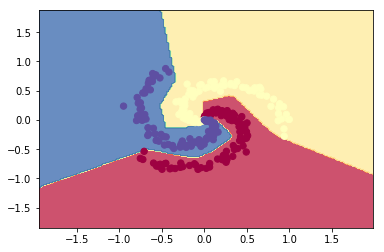

In [41]:
h=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()